In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("student_perf_mat_dummies.csv")

In [3]:
df

,Unnamed: 0,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,...,Walc_5,health_2,health_3,health_4,health_5,age,absences,G1,G2,G3
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,18,6,5,6,6
1,1,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,17,4,5,5,6
2,2,0,0,1,1,1,0,0,0,0,...,0,0,1,0,0,15,10,7,8,10
3,3,0,0,1,0,1,1,0,0,0,...,0,0,0,0,1,15,2,15,14,15
4,4,0,0,1,0,1,0,1,0,0,...,0,0,0,0,1,16,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,390,1,1,1,1,0,0,0,1,0,...,1,0,0,1,0,20,11,9,9,9
391,391,1,1,1,1,1,0,0,1,0,...,0,1,0,0,0,17,3,14,16,16
392,392,1,1,0,0,1,0,1,0,0,...,0,0,1,0,0,21,3,10,8,7
393,393,1,1,0,1,1,0,0,1,0,...,0,0,0,0,1,18,0,11,12,10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 75 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         395 non-null    int64 
 1   school_MS          395 non-null    int64 
 2   sex_M              395 non-null    int64 
 3   address_U          395 non-null    int64 
 4   famsize_LE3        395 non-null    int64 
 5   Pstatus_T          395 non-null    int64 
 6   Mjob_health        395 non-null    int64 
 7   Mjob_other         395 non-null    int64 
 8   Mjob_services      395 non-null    int64 
 9   Mjob_teacher       395 non-null    int64 
 10  Fjob_health        395 non-null    int64 
 11  Fjob_other         395 non-null    int64 
 12  Fjob_services      395 non-null    int64 
 13  Fjob_teacher       395 non-null    int64 
 14  reason_home        395 non-null    int64 
 15  reason_other       395 non-null    int64 
 16  reason_reputation  395 non-null    int64 
 1

In [5]:
df["results_pass"]

0      0
1      0
2      1
3      1
4      1
      ..
390    0
391    1
392    0
393    1
394    0
Name: results_pass, Length: 395, dtype: int64

In [6]:
df["results"]

0      fail
1      fail
2      pass
3      pass
4      pass
       ... 
390    fail
391    pass
392    fail
393    pass
394    fail
Name: results, Length: 395, dtype: object

In [7]:
X = df.drop(['G3', "results_pass", "Unnamed: 0", "results"], axis=1)
y = df["results"]

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [10]:
scaler = StandardScaler()

In [11]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [13]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    print(classification_report(y_test,preds))
    print('\n')
    plot_confusion_matrix(model, X_test, y_test)
    

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
model = LogisticRegression(max_iter=1000000,penalty='elasticnet',l1_ratio=0.1,C=1.0,multi_class='multinomial',solver='saga')

              precision    recall  f1-score   support

        fail       0.82      0.82      0.82        38
        pass       0.91      0.91      0.91        81

    accuracy                           0.88       119
   macro avg       0.86      0.86      0.86       119
weighted avg       0.88      0.88      0.88       119





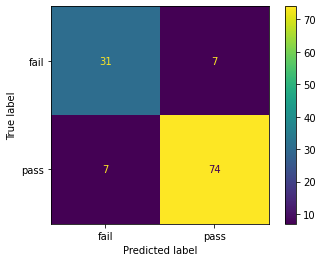

In [16]:
run_model(model, X_train, y_train, X_test, y_test)

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
log_modelo = LogisticRegression(max_iter=10000)

In [19]:
param_grid = {"penalty":["l1","l2","elasticnet"],
             "C":[0.001,0.005,0.01,0.02,0.05,0.1,0.2,0.5,0.99,1],
             "solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
             "multi_class":['ovr', 'multinomial'],
             "l1_ratio":[0.001,0.01,0.1,0.5,0.99,1]}

In [20]:
grid_modelo = GridSearchCV(log_modelo, param_grid=param_grid)

In [21]:
grid_modelo.fit(X_train, y_train)

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1348, in fit
    multi_class = _check_multi_class(self.multi_class, solver,
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 472, in _check_multi_class
    raise ValueError("Solver %s does not support "
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_l

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1348, in fit
    multi_class = _check_multi_class(self.multi_class, solver,
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 472, in _check_multi_class
    raise ValueError("Solver %s does not support "
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_l

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 449, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\site-pa

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1348, in fit
    multi_class = _check_multi_class(self.multi_class, solver,
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 472, in _check_multi_class
    raise ValueError("Solver %s does not support "
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_l

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1348, in fit
    multi_class = _check_multi_class(self.multi_class, solver,
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 472, in _check_multi_class
    raise ValueError("Solver %s does not support "
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_l

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\l

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1348, in fit
    multi_class = _check_multi_class(self.multi_class, solver,
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 472, in _check_multi_class
    raise Valu

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\site-

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueEr

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\site-

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueEr

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\site-

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call l

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueEr

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call l

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\site-

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call l

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\site-

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\site-

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueEr

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\site-

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

GridSearchCV(estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.001, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5,
                               0.99, 1],
                         'l1_ratio': [0.001, 0.01, 0.1, 0.5, 0.99, 1],
                         'multi_class': ['ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [22]:
grid_modelo.best_estimator_

LogisticRegression(C=0.05, l1_ratio=0.001, max_iter=10000, multi_class='ovr',
                   penalty='l1', solver='liblinear')

In [23]:
model = LogisticRegression(C=0.05, l1_ratio=0.001, max_iter=10000, multi_class='ovr',penalty='l1', solver='liblinear')

              precision    recall  f1-score   support

        fail       0.84      1.00      0.92        38
        pass       1.00      0.91      0.95        81

    accuracy                           0.94       119
   macro avg       0.92      0.96      0.94       119
weighted avg       0.95      0.94      0.94       119





C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "


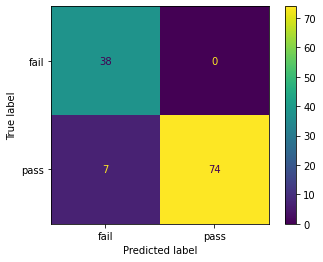

In [24]:
run_model(model, X_train, y_train, X_test, y_test)

In [25]:
from sklearn.svm import SVC

In [26]:
svc = SVC(class_weight="balanced")

In [27]:
param_grid_svc = {"C":[0.001,0.005,0.01,0.02,0.05,0.1,0.2,0.5,0.99,1],
                 "kernel":['linear', 'poly', 'rbf', 'sigmoid'],
                 "degree":[2,3,4,5,6,7,8,9,10],
                 "gamma":["scale","auto"]}

In [28]:
svc_grid_modelo = GridSearchCV(svc,param_grid_svc)

In [29]:
svc_grid_modelo.fit(X_train, y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5,
                               0.99, 1],
                         'degree': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [30]:
svc_grid_modelo.best_estimator_

SVC(C=0.05, class_weight='balanced', degree=2, kernel='linear')

In [31]:
model = SVC(C=0.05, class_weight='balanced', degree=2, kernel='linear')

              precision    recall  f1-score   support

        fail       0.78      0.84      0.81        38
        pass       0.92      0.89      0.91        81

    accuracy                           0.87       119
   macro avg       0.85      0.87      0.86       119
weighted avg       0.88      0.87      0.88       119





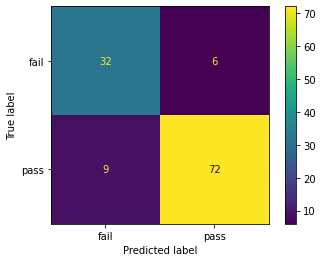

In [32]:
run_model(model, X_train, y_train, X_test, y_test)

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
model = DecisionTreeClassifier()

              precision    recall  f1-score   support

        fail       0.88      0.92      0.90        38
        pass       0.96      0.94      0.95        81

    accuracy                           0.93       119
   macro avg       0.92      0.93      0.92       119
weighted avg       0.93      0.93      0.93       119





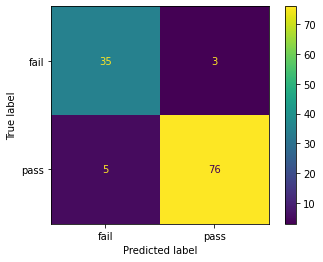

In [35]:
run_model(model, X_train, y_train, X_test, y_test)

In [36]:
model.feature_importances_

array([0.        , 0.        , 0.01397516, 0.01666489, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01086957, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.02717391, 0.        ,
       0.02135093, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01086957, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.04545455, 0.01343438, 0.        , 0.        , 0.        ,
       0.01235178, 0.        , 0.        , 0.        , 0.01449275,
       0.        , 0.        , 0.        , 0.        , 0.01086957,
       0.        , 0.        , 0.        , 0.        , 0.00790514,
       0.        , 0.        , 0.05031082, 0.05014234, 0.01771841,
       0.67641626])

In [37]:
Imp_feat_DT = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=["Feature Importances"])

In [38]:
Imp_feat_DT

,Feature Importances
school_MS,0.000000
sex_M,0.000000
address_U,0.013975
famsize_LE3,0.016665
Pstatus_T,0.000000
...,...
health_5,0.000000
age,0.050311
absences,0.050142
G1,0.017718


In [39]:
Imp_feat_DT[Imp_feat_DT["Feature Importances"] > 0.01].sort_values("Feature Importances")

,Feature Importances
Fjob_other,0.010870
studytime_2,0.010870
Walc_2,0.010870
freetime_5,0.012352
famrel_5,0.013434
address_U,0.013975
goout_5,0.014493
famsize_LE3,0.016665
G1,0.017718
Fedu_1,0.021351


<AxesSubplot:>

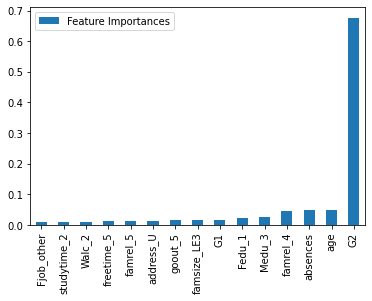

In [40]:
Imp_feat_DT[Imp_feat_DT["Feature Importances"] > 0.01].sort_values("Feature Importances").plot(kind="bar")

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
model = RandomForestClassifier()

              precision    recall  f1-score   support

        fail       0.85      0.76      0.81        38
        pass       0.89      0.94      0.92        81

    accuracy                           0.88       119
   macro avg       0.87      0.85      0.86       119
weighted avg       0.88      0.88      0.88       119



              precision    recall  f1-score   support

        fail       0.86      0.97      0.91        38
        pass       0.99      0.93      0.96        81

    accuracy                           0.94       119
   macro avg       0.92      0.95      0.93       119
weighted avg       0.95      0.94      0.94       119



              precision    recall  f1-score   support

        fail       0.87      0.89      0.88        38
        pass       0.95      0.94      0.94        81

    accuracy                           0.92       119
   macro avg       0.91      0.92      0.91       119
weighted avg       0.93      0.92      0.92       119



             

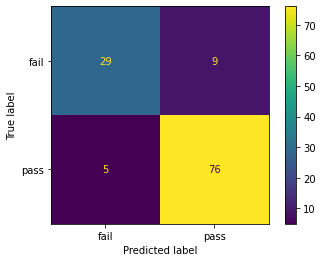

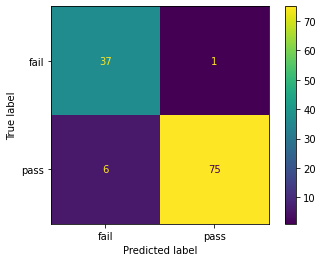

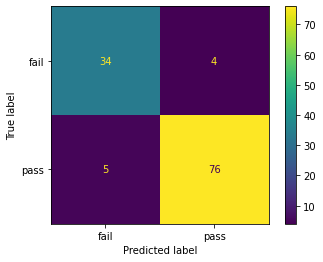

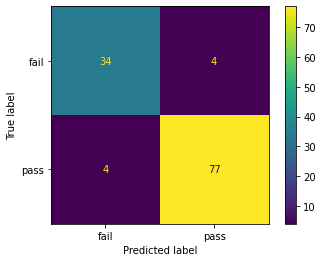

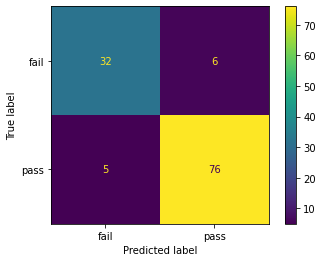

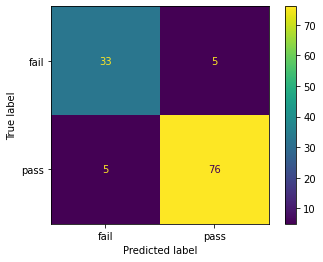

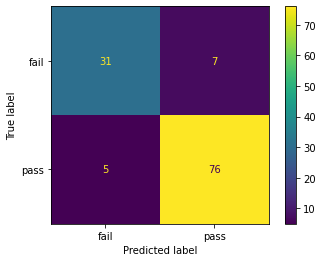

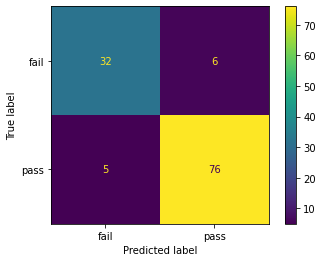

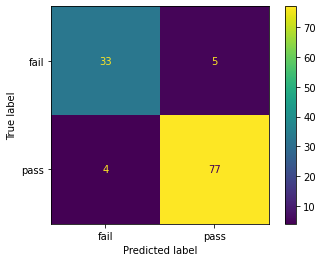

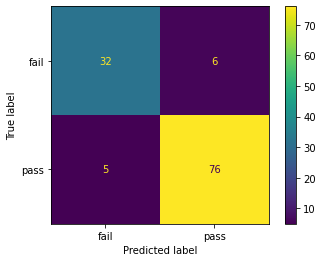

In [43]:
trees = list(range(10,110,10))
for n in trees:
    
    model = RandomForestClassifier(n_estimators=n)
    
    run_model(model,X_train,y_train,X_test,y_test)

In [44]:
model.feature_importances_

array([0.004279  , 0.00848013, 0.00477003, 0.00924423, 0.00534398,
       0.0030359 , 0.00617376, 0.00607603, 0.00698875, 0.00293174,
       0.00957153, 0.00642302, 0.00196694, 0.00709707, 0.00503313,
       0.00842478, 0.00880462, 0.00447584, 0.00971711, 0.00765243,
       0.00929691, 0.00743611, 0.00492067, 0.00969353, 0.00668745,
       0.00990862, 0.00882611, 0.00519624, 0.00594462, 0.00561501,
       0.00588343, 0.00537714, 0.00652532, 0.00678393, 0.00908684,
       0.00348784, 0.00093352, 0.00659949, 0.00748531, 0.00302038,
       0.01199738, 0.00508429, 0.00668315, 0.00234039, 0.00446912,
       0.00703789, 0.00737503, 0.00521839, 0.01016392, 0.00633011,
       0.00591767, 0.00875909, 0.00716899, 0.00803864, 0.0096249 ,
       0.00722697, 0.00385363, 0.00177181, 0.00210133, 0.00735115,
       0.00848511, 0.00573718, 0.00533722, 0.0041516 , 0.00816135,
       0.0052155 , 0.00698808, 0.02605744, 0.04433465, 0.2104879 ,
       0.29133167])

In [45]:
Imp_feat_RF = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=["Feature Importances"])

In [46]:
Imp_feat_RF

,Feature Importances
school_MS,0.004279
sex_M,0.008480
address_U,0.004770
famsize_LE3,0.009244
Pstatus_T,0.005344
...,...
health_5,0.006988
age,0.026057
absences,0.044335
G1,0.210488


In [49]:
Imp_feat_RF[Imp_feat_RF["Feature Importances"] > 0.009].sort_values("Feature Importances")

,Feature Importances
traveltime_2,0.009087
famsize_LE3,0.009244
paid_yes,0.009297
Fjob_other,0.009572
goout_5,0.009625
higher_yes,0.009694
schoolsup_yes,0.009717
romantic_yes,0.009909
freetime_3,0.010164
failures_1,0.011997


<AxesSubplot:>

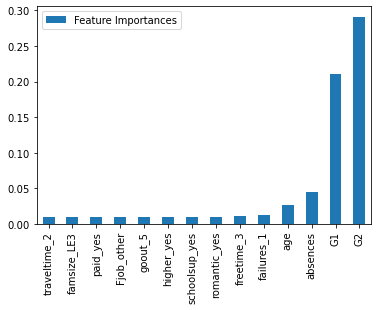

In [50]:
Imp_feat_RF[Imp_feat_RF["Feature Importances"] > 0.009].sort_values("Feature Importances").plot(kind="bar")

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

In [52]:
model = GradientBoostingClassifier()

              precision    recall  f1-score   support

        fail       0.84      0.95      0.89        38
        pass       0.97      0.91      0.94        81

    accuracy                           0.92       119
   macro avg       0.91      0.93      0.92       119
weighted avg       0.93      0.92      0.93       119





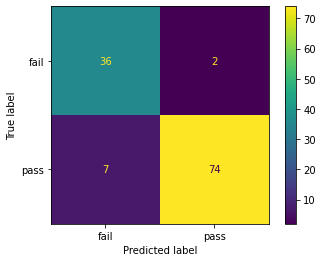

In [53]:
run_model(model, X_train, y_train, X_test, y_test)

In [54]:
model.feature_importances_

array([1.46907028e-04, 4.86146693e-04, 2.66793390e-03, 4.87302028e-03,
       0.00000000e+00, 0.00000000e+00, 3.49386963e-03, 0.00000000e+00,
       6.71377708e-03, 0.00000000e+00, 2.20580231e-02, 6.92696542e-04,
       2.77843234e-04, 4.02959840e-05, 4.12933347e-03, 2.57839301e-04,
       4.17523022e-04, 2.47079521e-04, 1.07608811e-02, 1.24310538e-03,
       0.00000000e+00, 3.20894076e-04, 4.25858160e-04, 0.00000000e+00,
       0.00000000e+00, 2.81155195e-04, 0.00000000e+00, 1.10611778e-04,
       7.17972462e-05, 1.15717420e-06, 3.08205106e-03, 3.92441180e-04,
       2.11450817e-04, 2.24099847e-05, 1.04206255e-03, 1.52274241e-05,
       0.00000000e+00, 7.87911394e-09, 1.50193361e-03, 6.01705925e-06,
       0.00000000e+00, 2.55520809e-03, 1.60353194e-02, 3.47807293e-05,
       7.37588280e-04, 1.58902653e-03, 3.11144056e-03, 1.61871090e-03,
       2.68606759e-04, 2.87859208e-03, 4.18613293e-03, 1.05326593e-04,
       3.33290003e-05, 7.07795126e-04, 1.11584792e-02, 1.98736089e-05,
      

In [55]:
Imp_feat_GB = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=["Feature Importances"])

In [56]:
Imp_feat_GB

,Feature Importances
school_MS,0.000147
sex_M,0.000486
address_U,0.002668
famsize_LE3,0.004873
Pstatus_T,0.000000
...,...
health_5,0.024111
age,0.032340
absences,0.020377
G1,0.038055


In [57]:
Imp_feat_GB[Imp_feat_GB["Feature Importances"] > 0.01].sort_values("Feature Importances")

,Feature Importances
schoolsup_yes,0.010761
goout_5,0.011158
failures_3,0.016035
absences,0.020377
Fjob_other,0.022058
health_5,0.024111
age,0.032340
G1,0.038055
G2,0.746914


<AxesSubplot:>

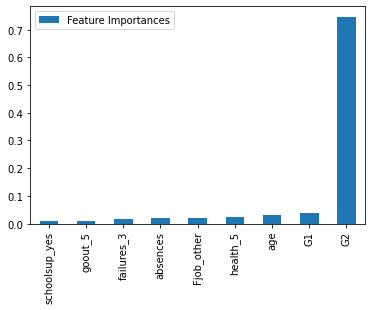

In [58]:
Imp_feat_GB[Imp_feat_GB["Feature Importances"] > 0.01].sort_values("Feature Importances").plot(kind="bar")

In [59]:
from sklearn.ensemble import AdaBoostClassifier

In [60]:
model = AdaBoostClassifier()

              precision    recall  f1-score   support

        fail       0.83      0.79      0.81        38
        pass       0.90      0.93      0.91        81

    accuracy                           0.88       119
   macro avg       0.87      0.86      0.86       119
weighted avg       0.88      0.88      0.88       119





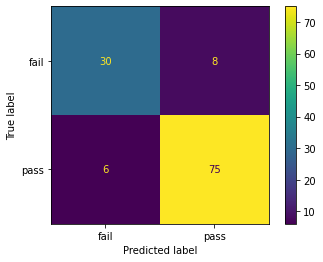

In [61]:
run_model(model,X_train,y_train,X_test,y_test)

In [62]:
model.feature_importances_

array([0.  , 0.  , 0.02, 0.02, 0.02, 0.  , 0.04, 0.  , 0.  , 0.  , 0.02,
       0.  , 0.  , 0.  , 0.04, 0.  , 0.  , 0.02, 0.02, 0.  , 0.  , 0.02,
       0.  , 0.02, 0.  , 0.  , 0.02, 0.  , 0.  , 0.  , 0.02, 0.  , 0.  ,
       0.  , 0.02, 0.02, 0.  , 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.02,
       0.  , 0.  , 0.02, 0.  , 0.  , 0.  , 0.06, 0.  , 0.  , 0.04, 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.02, 0.  , 0.  , 0.  , 0.02,
       0.  , 0.04, 0.22, 0.04, 0.16])

In [63]:
Imp_feat_AB = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=["Feature Importances"])

In [64]:
Imp_feat_AB

,Feature Importances
school_MS,0.00
sex_M,0.00
address_U,0.02
famsize_LE3,0.02
Pstatus_T,0.02
...,...
health_5,0.00
age,0.04
absences,0.22
G1,0.04


In [65]:
Imp_feat_AB[Imp_feat_AB["Feature Importances"] > 0.02].sort_values("Feature Importances")

,Feature Importances
Mjob_other,0.04
reason_other,0.04
goout_4,0.04
age,0.04
G1,0.04
freetime_5,0.06
G2,0.16
absences,0.22


<AxesSubplot:>

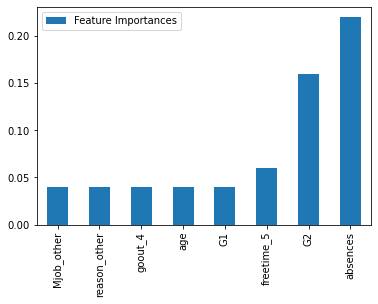

In [66]:
Imp_feat_AB[Imp_feat_AB["Feature Importances"] > 0.02].sort_values("Feature Importances").plot(kind="bar")